<a href="https://colab.research.google.com/github/Huong2k1/AI_homework/blob/main/Food_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model





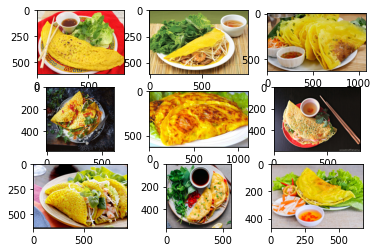

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Data_food/train/banhxeo/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'banhxeo' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()


In [ ]:
model=Sequential() #CNN
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) # tìm giá trị lớn nhất trong ma trận 8x8 để làm cho ảnh có độ nổi lên
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten()) #ANN
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       2

In [ ]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                validation_split=0.2)  

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Data_food/train',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')



Found 320 images belonging to 10 classes.


In [ ]:
history=model.fit(train_dataset,batch_size=10,epochs=50,verbose=1)


Epoch 1/50
32/32 [==============================] - 6s 169ms/step - loss: 0.6401 - accuracy: 0.7937
Epoch 2/50
32/32 [==============================] - 5s 169ms/step - loss: 0.5551 - accuracy: 0.8281
Epoch 3/50
32/32 [==============================] - 5s 170ms/step - loss: 0.5633 - accuracy: 0.8125
Epoch 4/50
32/32 [==============================] - 5s 168ms/step - loss: 0.6871 - accuracy: 0.7625
Epoch 5/50
32/32 [==============================] - 5s 166ms/step - loss: 0.6530 - accuracy: 0.7563
Epoch 6/50
32/32 [==============================] - 5s 166ms/step - loss: 0.6657 - accuracy: 0.7625
Epoch 7/50
32/32 [==============================] - 5s 165ms/step - loss: 0.5364 - accuracy: 0.8219
Epoch 8/50
32/32 [==============================] - 5s 165ms/step - loss: 0.5454 - accuracy: 0.8125
Epoch 9/50
32/32 [==============================] - 5s 164ms/step - loss: 0.5913 - accuracy: 0.7937
Epoch 10/50
32/32 [==============================] - 5s 165ms/step - loss: 0.4653 - accuracy: 0.8438

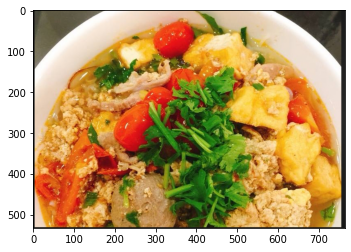

Bun rieu


In [ ]:
filename = '/content/drive/MyDrive/Data_food/test/bunrieu/bunrieu2.jpg'  
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()
img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Pho')
elif kq ==1:
  print('Banh mi')
elif kq ==2:
  print('Banh xeo')
elif kq ==3:
  print('Bun cha')
elif kq ==4:
  print('Bun rieu')
elif kq ==5:
  print('Che troi nuoc')
elif kq ==6:
  print('Ga kho')
elif kq ==7:
  print('Goi cuon')
elif kq ==8:
  print('Mi quang')
elif kq ==9:
  print('Thit kho')

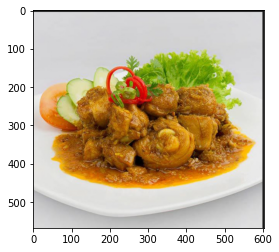

Ga kho


In [ ]:
filename = '/content/drive/MyDrive/Data_food/test/gakho/ga5.jpg'  
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()
img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Pho')
elif kq ==1:
  print('Banh mi')
elif kq ==2:
  print('Banh xeo')
elif kq ==3:
  print('Bun cha')
elif kq ==4:
  print('Bun rieu')
elif kq ==5:
  print('Che troi nuoc')
elif kq ==6:
  print('Ga kho')
elif kq ==7:
  print('Goi cuon')
elif kq ==8:
  print('Mi quang')
elif kq ==9:
  print('Thit kho')

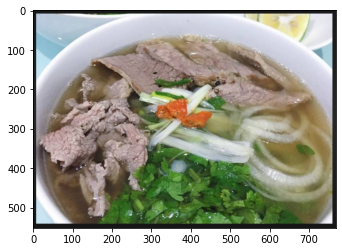

Pho


In [ ]:
filename = '/content/drive/MyDrive/Data_food/test/Pho/pho1.jpg'  
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()
img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Pho')
elif kq ==1:
  print('Banh mi')
elif kq ==2:
  print('Banh xeo')
elif kq ==3:
  print('Bun cha')
elif kq ==4:
  print('Bun rieu')
elif kq ==5:
  print('Che troi nuoc')
elif kq ==6:
  print('Ga kho')
elif kq ==7:
  print('Goi cuon')
elif kq ==8:
  print('Mi quang')
elif kq ==9:
  print('Thit kho')

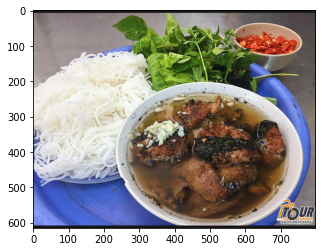

Bun cha


In [ ]:
filename = '/content/drive/MyDrive/Data_food/test/buncha/buncha6.jpg'  
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()
img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Pho')
elif kq ==1:
  print('Banh mi')
elif kq ==2:
  print('Banh xeo')
elif kq ==3:
  print('Bun cha')
elif kq ==4:
  print('Bun rieu')
elif kq ==5:
  print('Che troi nuoc')
elif kq ==6:
  print('Ga kho')
elif kq ==7:
  print('Goi cuon')
elif kq ==8:
  print('Mi quang')
elif kq ==9:
  print('Thit kho')